### Extração DW

In [33]:
import pandas as pd
from sqlalchemy import create_engine
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
# parametros db
server = 'localhost'
database = 'customeranalysis'
driver = 'ODBC Driver 17 for SQL Server'
databasecon = f'mssql://@{server}/{database}?driver={driver}'

engine = create_engine(databasecon)
con = engine.connect()

In [7]:
#Sql para dataframe pandas
customer = pd.read_sql_query('SELECT * FROM [customeranalysis].[dbo].[customer]' , con)
sales = pd.read_sql_query('SELECT * FROM [customeranalysis].[dbo].[sales]' , con)
store = pd.read_sql_query('SELECT * FROM [customeranalysis].[dbo].[store]' , con)
currency = pd.read_sql_query('SELECT * FROM [customeranalysis].[dbo].[currency]' , con)
product = pd.read_sql_query('SELECT * FROM [customeranalysis].[dbo].[product]' , con)

In [29]:
sales.columns

Index(['id', 'OrderKey', 'LineNumber', 'OrderDate', 'DeliveryDate',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'UnitPrice',
       'NetPrice', 'UnitCost', 'CurrencyCode', 'ExchangeRate', 'amount',
       'year_month'],
      dtype='object')

### Questões do negócio

1. Top 10 clientes com mais faturamento no último ano
2. Top 10 CLV 
3. Top 3 meses com maior faturamento médio

##### 1. Top 10 clientes com mais faturamento no último ano

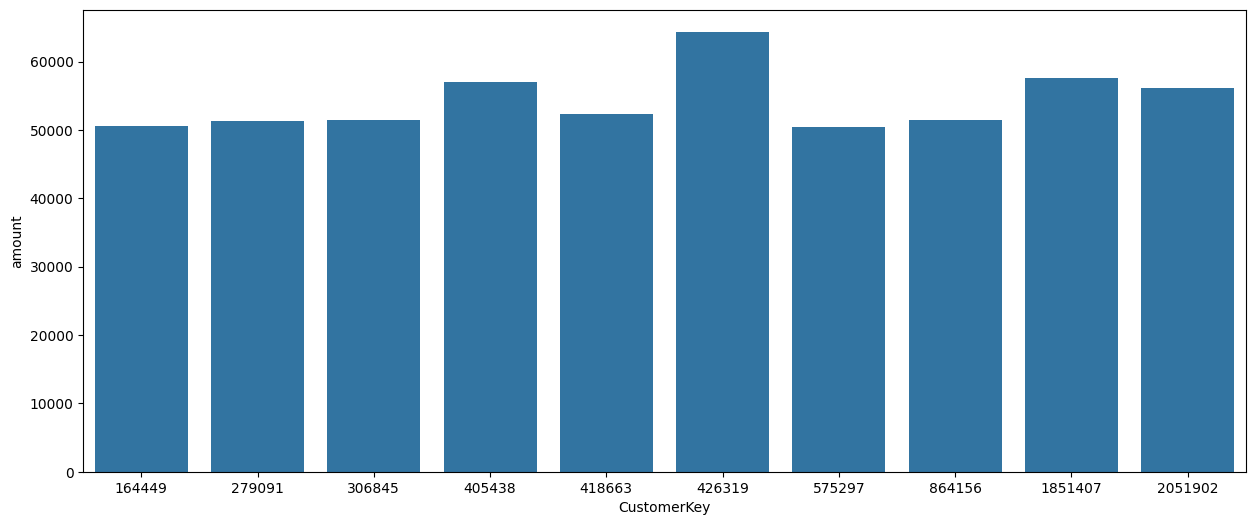

In [21]:
sales['amount'] = sales['Quantity'] * sales['UnitPrice']

sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

# Filtrar vendas do último ano
last_year = pd.to_datetime('today').year - 1
sales_last_year = sales[sales['OrderDate'].dt.year == last_year]

# Agrupar por cliente e calcular o faturamento total
customer_sales = sales_last_year.groupby('CustomerKey')['amount'].sum().reset_index()

# Ordenar e pegar os top 10 clientes
top_10_customers = customer_sales.sort_values(by='amount', ascending=False).head(10)


plt.figure(figsize=(15,6))
sns.barplot(top_10_customers,x='CustomerKey' ,y='amount')
plt.show()

##### 2. Amount por pais

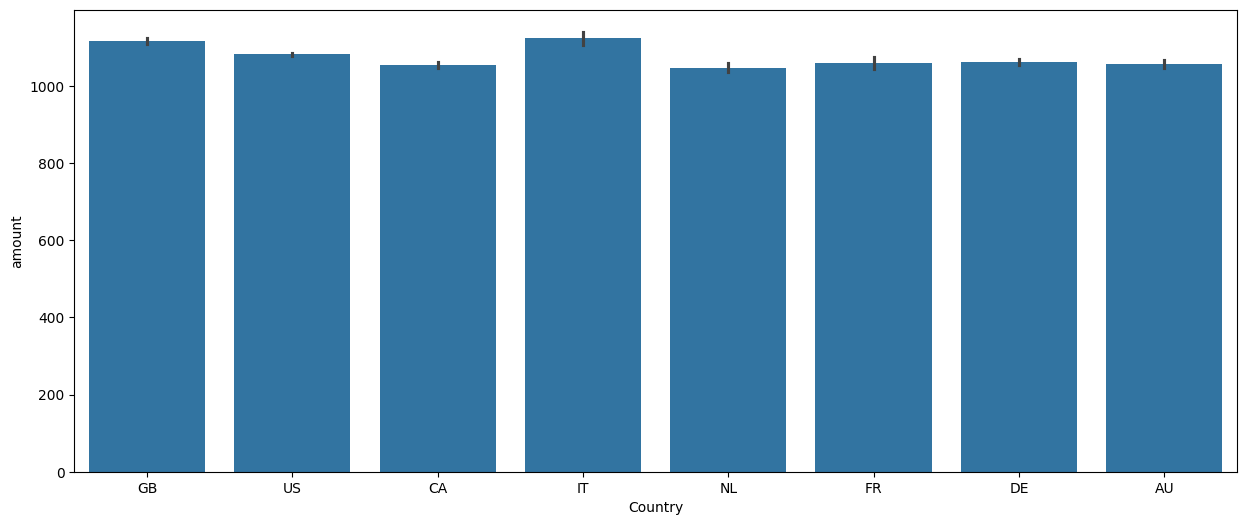

In [27]:
merged_data = pd.merge(sales, customer, on='CustomerKey', how='inner')

plt.figure(figsize=(15,6))
sns.barplot(merged_data,x='Country' ,y='amount')
plt.show()

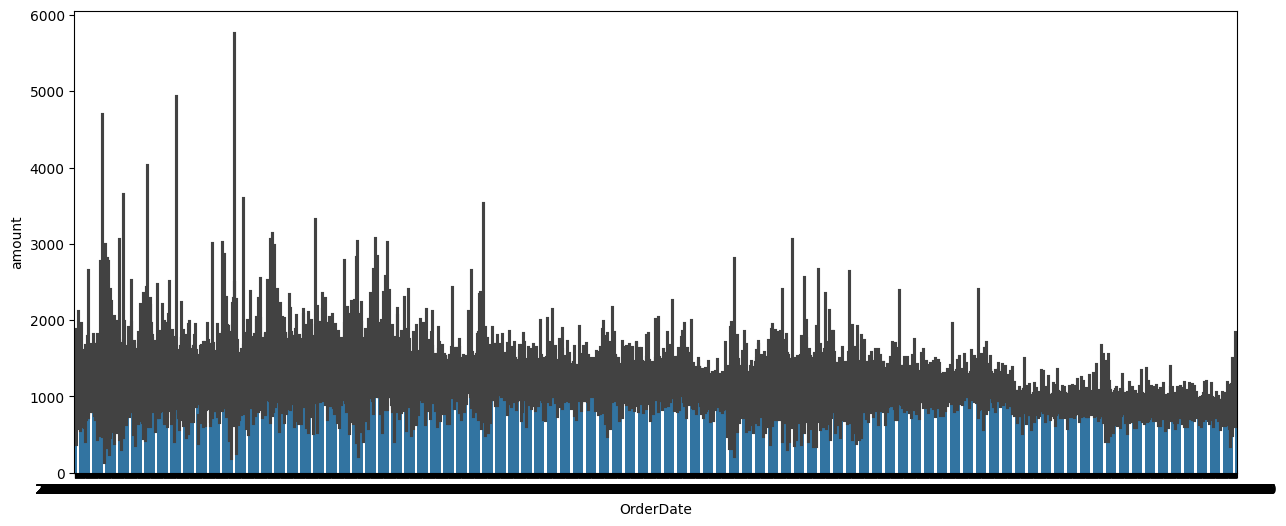

In [30]:
#analise temporal
plt.figure(figsize=(20,6))
sns.barplot(sales,x='OrderDate' ,y='amount')
plt.show()

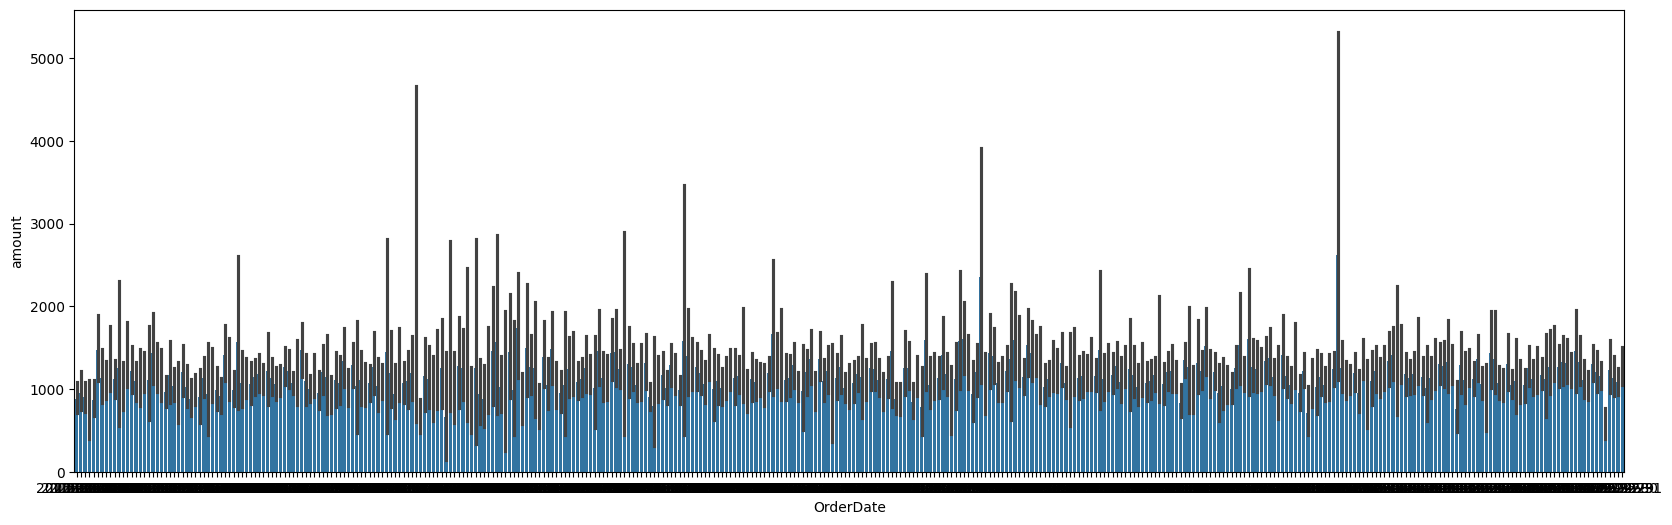

In [32]:
# Filtrando apenas para o ano de 2015
sales_2015 = sales[sales['OrderDate'].dt.year == 2015]

# Criando o gráfico
plt.figure(figsize=(20,6))
sns.barplot(data=sales_2015, x='OrderDate', y='amount')
plt.show()

In [31]:
#variaveis importantes
sales.describe()

,id,OrderKey,LineNumber,OrderDate,CustomerKey,StoreKey,ProductKey,Quantity,UnitPrice,NetPrice,UnitCost,ExchangeRate,amount
count,2.098633e+06,2.098633e+06,2.098633e+06,2098633,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06,2.098633e+06
mean,1.049316e+06,2.153613e+07,1.164781e+00,2020-11-22 14:10:48.398075392,1.140539e+06,3.881381e+05,1.173045e+03,3.142454e+00,3.429303e+02,3.226334e+02,1.423459e+02,1.015386e+00,1.077885e+03
min,0.000000e+00,1.000000e+04,0.000000e+00,2015-01-01 00:00:00,1.500000e+01,1.000000e+01,1.000000e+00,1.000000e+00,9.500000e-01,8.170000e-01,4.800000e-01,6.284600e-01,9.500000e-01
25%,5.246580e+05,1.457063e+07,0.000000e+00,2018-12-27 00:00:00,5.619010e+05,3.800000e+02,4.540000e+02,1.000000e+00,5.055000e+01,4.699000e+01,2.358900e+01,9.265300e-01,1.147918e+02
50%,1.049316e+06,2.457007e+07,1.000000e+00,2021-09-22 00:00:00,1.237777e+06,5.850000e+02,1.427000e+03,2.000000e+00,2.049918e+02,1.916640e+02,8.613800e+01,1.000000e+00,4.200000e+02
75%,1.573974e+06,2.901040e+07,2.000000e+00,2022-12-10 00:00:00,1.670723e+06,9.999990e+05,1.644000e+03,4.000000e+00,4.200000e+02,3.959901e+02,1.886360e+02,1.000000e+00,1.195000e+03
max,2.098632e+06,3.398037e+07,6.000000e+00,2024-04-20 00:00:00,2.099743e+06,9.999990e+05,2.517000e+03,1.000000e+01,6.247500e+03,6.247500e+03,2.069925e+03,1.725300e+00,6.247500e+04
std,6.058233e+05,8.928802e+06,1.362582e+00,NaN,6.090486e+05,4.870795e+05,6.885762e+02,2.251773e+00,4.830375e+02,4.556574e+02,1.780214e+02,1.731865e-01,2.018161e+03


In [36]:
# utilizando plotly comom gráfico interativo
fig = px.line(sales, x="OrderDate", y="amount", title='sales time series')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed